In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Step 1: Load and Prepare the Data
def load_data(file_path):
    """
    Load the Advertising dataset and separate features and target.
    """
    data = pd.read_csv(file_path)
    X = data[['TV', 'Radio', 'Newspaper']].values
    y = data['Sales'].values
    return X, y

In [3]:
data = pd.read_csv("Advertising.csv")
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

print(X[:5],y[:5])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]] [22.1 10.4  9.3 18.5 12.9]


In [4]:
#normalize_features
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
print(X[:5])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]


In [5]:
#Adding extra column of all one's to X
X = np.c_[np.ones(X.shape[0]), X]
print(X[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]


In [6]:
#Splitting Dataset 85% train - rest test
def train_test_split(X, y, train_size = 0.85):
    n_train = int(len(X) * train_size)
    return X[:n_train], y[:n_train], X[n_train:], y[n_train:]


X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train[:5], y_train[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]] [22.1 10.4  9.3 18.5 12.9]


# ITEM NUMBER 5

In [7]:
#1. Initialize weights (alpha)
def initialized_weights(n_features = 4, seed = None):
    if seed is not None:
        np.random.seed(seed)

    init_w = np.random.uniform(0, 1, n_features)

    return init_w



In [8]:
#2. Predict
# predict = np.dot(X, init_w)
# print(predict[:5])

def predict(X, theta):
    return np.dot(X, theta)

In [9]:
#3. Compute Cost
# m = len(y)
# cost = 1 / (2 * m) * np.sum((predict - y) ** 2)
# print(cost)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X,theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

In [10]:
#4. Compute Gradient
# m = len(y)
# gradient = (1 / m) * np.dot (X.T, (predict - y))
# print(f"Matrix size:{gradient.shape}")
# print(gradient)

def compute_gradient(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

In [11]:
#5. Update Weights
alpha = 0.01
# Updated_weights = init_w - alpha * gradient
# print(Updated_weights)

def update_weights(theta, alpha, gradient):
    return theta - alpha * gradient

In [12]:
#6. Loop functions 1 - 5, Gradient_Descent
iterations = 1000
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = update_weights(theta, gradient, alpha)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

init_w = initialized_weights(n_features = 4)
theta = init_w

#Remove Seed for randomness
#init_w = np.array([0.0, 0.0, 0.0, 0.0]) #to set weights to 0000

theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
print(cost_history)

[100.77827201304441, 98.79624304557873, 96.85454400437926, 94.95233466269393, 93.08879278307545, 91.26311372037348, 89.47451003377327, 87.72221110766819, 86.00546278115861, 84.32352698597417, 82.6756813926221, 81.06121906456806, 79.47944812026203, 77.92969140282455, 76.41128615721475, 74.92358371470478, 73.46594918449016, 72.03776115226918, 70.63841138562873, 69.26730454607795, 67.92385790757481, 66.60750108139435, 65.3176757471909, 64.05383539011076, 62.815445043814115, 61.60198103926953, 60.4129307591868, 59.24779239795776, 58.10607472697706, 56.98729686521886, 55.890988054947435, 54.816687442443424, 53.76394386362966, 52.73231563448363, 51.72137034612604, 50.7306846644781, 49.75984413438179, 48.80844298808102, 47.87608395796305, 46.96237809346236, 46.06694458203152, 45.18941057408576, 44.32941101183011, 43.48658846188024, 42.660592951590125, 41.851081809001826, 41.05771950633463, 40.280177506932624, 39.518134115592005, 38.771274332190806, 38.03928970854606, 37.32187820842467, 36.618

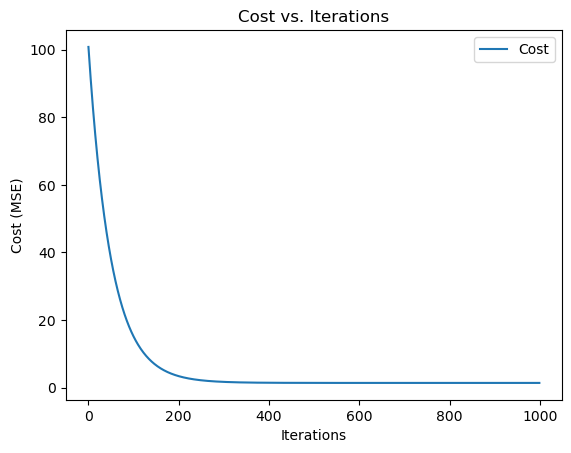

In [13]:
#7. Plot Costs
def plot_costs(cost_history):
    plt.plot(cost_history, label='Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost vs. Iterations')
    plt.legend()
    plt.show()

plot_costs(cost_history)

In [14]:
#8. Predict y for train set and calculate the cost.

def compute_cost_train(y_true, y_pred):
    m = len(y_true)  # Number of samples
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

# Predict y for the training set
train_predictions = predict(X_train, theta)

# Compute the cost using the true y values (y_train) and predictions
train_cost = compute_cost_train(y_train, train_predictions)

print("Cost for the training set:", train_cost)

Cost for the training set: 1.4059329396482718


In [15]:
#9. Predict y for test set and calculate the cost

def compute_cost_test(y_true, y_pred):
    m = len(y_true)  # Number of samples
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

# Predict y for the test set
test_predictions = predict(X_test, theta)

# Compute the cost using the true y values (y_test) and predictions
test_cost = compute_cost_test(y_test, test_predictions)

print("Cost for the test set:", test_cost)

Cost for the test set: 1.3684842964594295
